In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification

In [24]:
X , y = make_classification(
    n_samples = 100 , n_features = 2 , n_informative = 2 , n_redundant = 0,
    n_clusters_per_class = 1 , random_state = 2 , hypercube = False , class_sep = 1
)

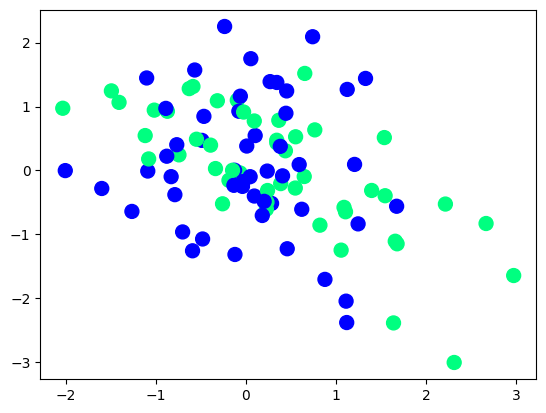

In [25]:
plt.scatter(X[ : , 0] , X[ : , 1] , c = y , cmap = 'winter' , s = 100)
plt.show()

In [26]:
# convert class from {0 , 1} to {-1 , + 1}
y = np.where(y == 0 , -1 , 1)

In [27]:
def perceptron_loss(X , y , w , b):
    """Compute mean perceptron loss for given parameters"""
    total_loss = 0
    for i in range(len(X)): 
        total_loss += max(0 , -y[i] * (np.dot(w , X[i]) + b))
    # return mean loss 
    return total_loss / len(X)

In [28]:
def perceptron_train(X , y , lr = 0.1 , epochs = 20): 
    n_samples , n_features = X.shape
    # initialize weights and bias with 0 or some random values
    w = np.zeros(n_features)
    b = 0 

    # now loop through number of epochs
    for epoch in range(epochs): 
        # now calculate for every rows 
        for i in range(n_samples): 
            # check if mis-classified
            if y[i] * (np.dot(w , X[i]) + b) <= 0:
                # update weights and bias 
                w = w + lr * y[i] * X[i] 
                b = b + lr * y[i] 

        # print loss per epoch  
        loss = perceptron_loss(X , y , w , b) 
        print(f"Epoch {epoch + 1 : 02d}: Loss = {loss : .4f}")

    return w , b

In [29]:
w , b = perceptron_train(X , y , lr = 0.1 , epochs = 10)

Epoch  1: Loss =  0.0624
Epoch  2: Loss =  0.0746
Epoch  3: Loss =  0.0571
Epoch  4: Loss =  0.0227
Epoch  5: Loss =  0.0843
Epoch  6: Loss =  0.0590
Epoch  7: Loss =  0.0559
Epoch  8: Loss =  0.0531
Epoch  9: Loss =  0.0503
Epoch  10: Loss =  0.0603


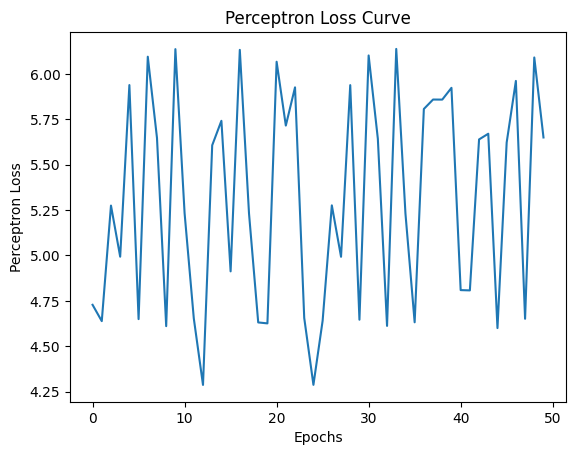

In [23]:
# Generate dataset
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, flip_y=0.1, class_sep=0.5, random_state=2
)
y = np.where(y == 0, -1, 1)  # Convert labels to {-1, 1}

# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0
lr = 0.1
epochs = 50

losses = []

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for xi, yi in zip(X, y):
        margin = yi * (np.dot(w, xi) + b)
        loss = max(0, -margin)  # Perceptron loss
        total_loss += loss

        if margin <= 0:  # Misclassified
            w += lr * yi * xi
            b += lr * yi

    losses.append(total_loss)

# Plot loss vs epoch
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Perceptron Loss")
plt.title("Perceptron Loss Curve")
plt.show()
